In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

C:\Users\Mukul\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../../Excel/wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [8]:
df.drop(labels = "Customer_Segment", axis = 1, inplace = True)

In [12]:
df.isnull().any().sum()

0

In [16]:
df.shape

(178, 13)

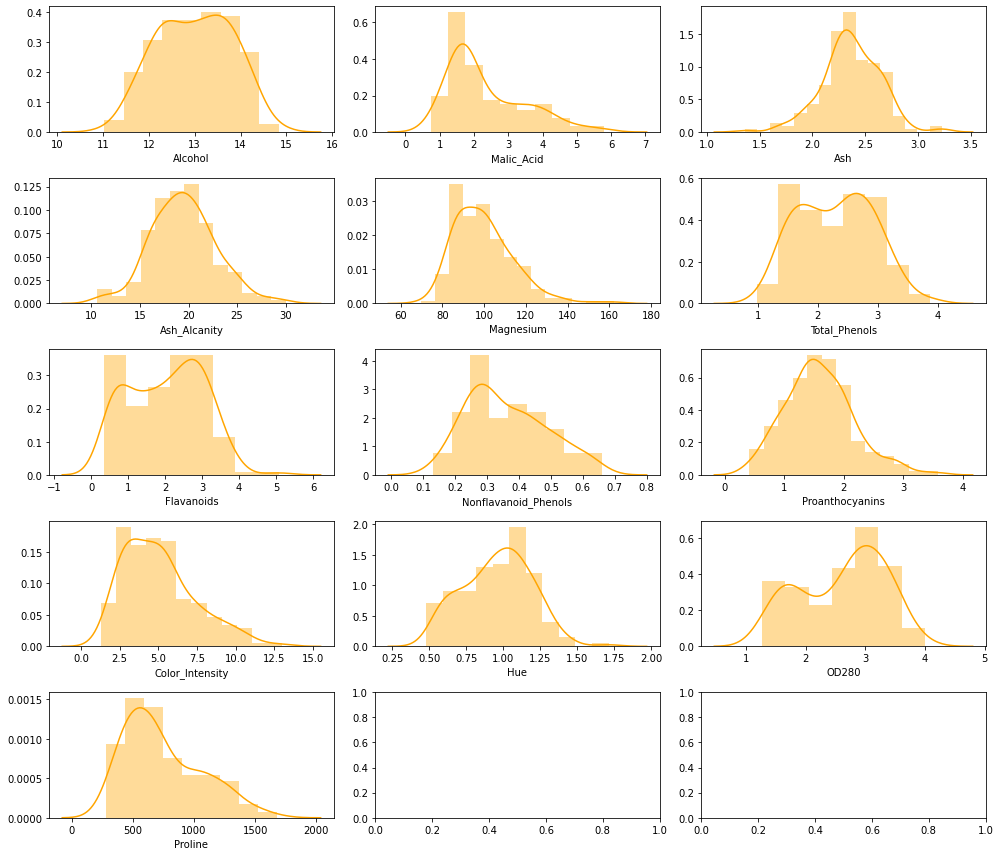

In [20]:
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df.columns):
    sns.distplot(df[c], ax = axes_[i], color = 'orange')
    plt.tight_layout()

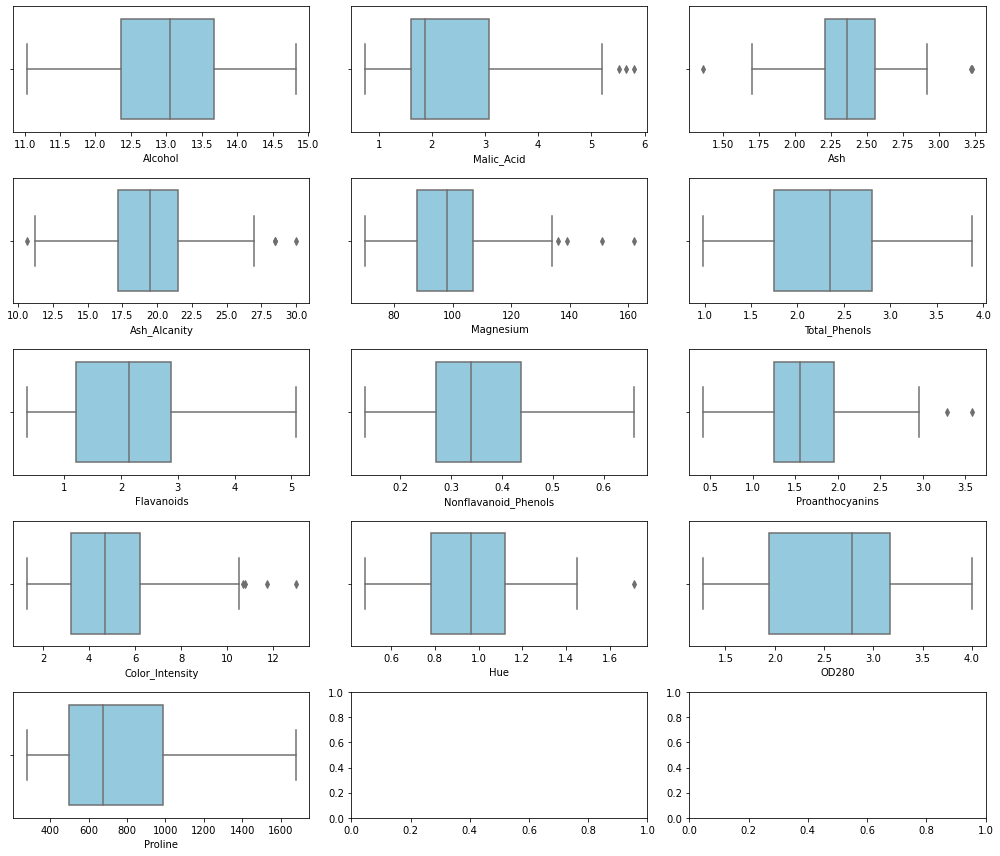

In [28]:
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df.columns):
    sns.boxplot(df[c], ax = axes_[i], color = 'skyblue')
    plt.tight_layout()

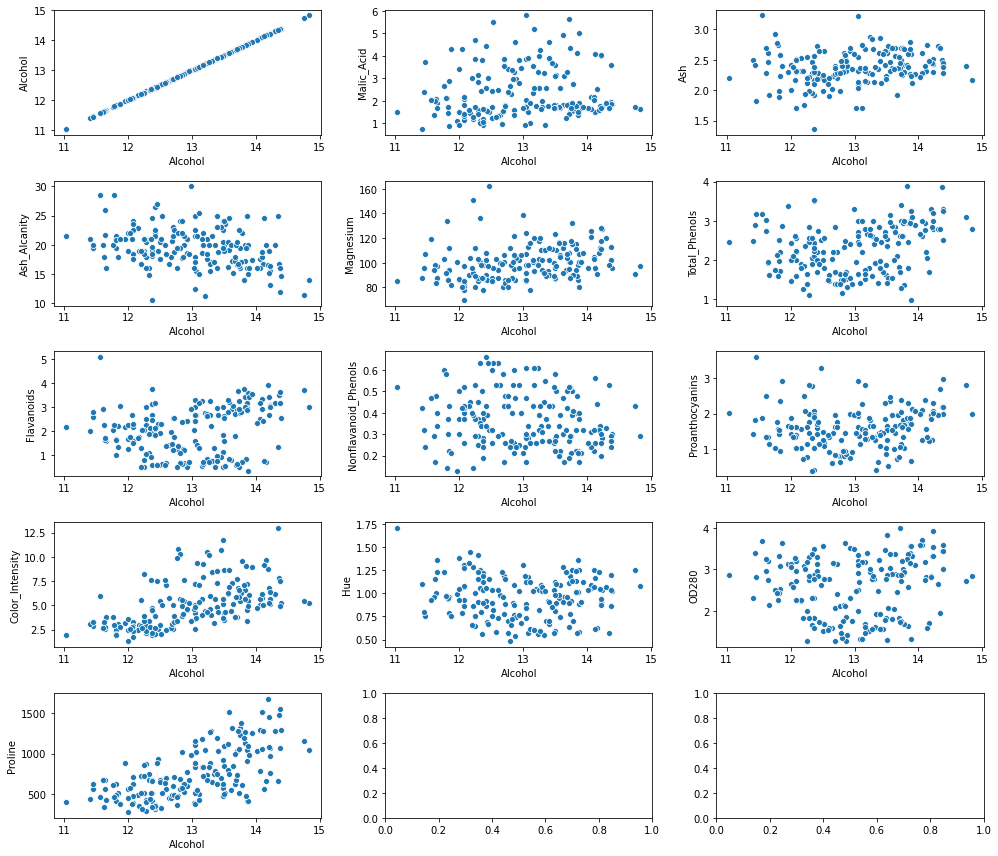

In [36]:
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df.columns):
    sns.scatterplot(x = "Alcohol", y = df[c], data = df, ax = axes_[i])
    plt.tight_layout()

From the above scatterplot we can see that there is some relation between Alcohol & Proline, Color_Intensity. Also there is one thing to notice as well, as the alcohol increasing the ash alcanity is declinig to a marginal extent.

In [42]:
corr = df.corr()

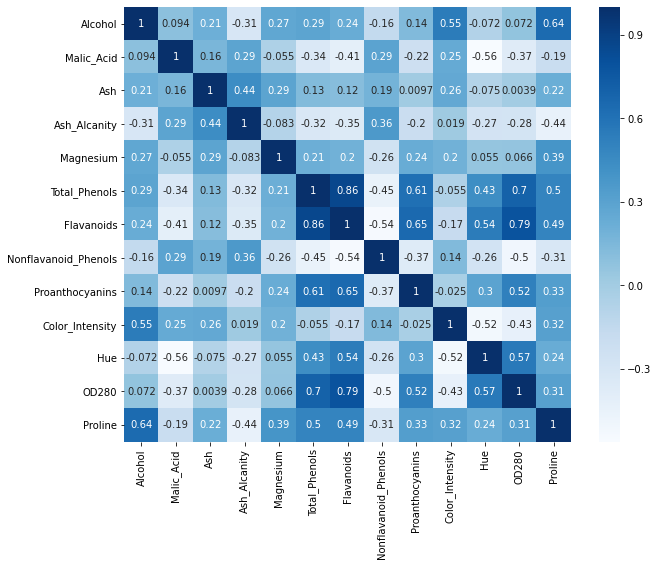

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap="Blues")

In [52]:
threshold = 0.6

In [63]:
corr[corr > threshold]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64372
Malic_Acid,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash_Alcanity,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Phenols,NaN,NaN,NaN,NaN,NaN,1.000000,0.864564,NaN,0.612413,NaN,NaN,0.699949,NaN
Flavanoids,NaN,NaN,NaN,NaN,NaN,0.864564,1.000000,NaN,0.652692,NaN,NaN,0.787194,NaN
Nonflavanoid_Phenols,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Proanthocyanins,NaN,NaN,NaN,NaN,NaN,0.612413,0.652692,NaN,1.000000,NaN,NaN,NaN,NaN
Color_Intensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [65]:
col = ["Proline", "Flavanoids", "Proanthocyanins", "OD280"]

In [66]:
df_new = df

In [68]:
df_new.drop(labels = col, axis = 1, inplace = True)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
se = StandardScaler()

In [71]:
col_n = df_new.columns

In [74]:
se_ = se.fit_transform(df_new)

In [76]:
df_ = pd.DataFrame(se_, columns = col_n)

In [77]:
np.random.seed(42)

In [113]:
clusters = range(2, 16)

In [202]:
inertia = []
sil_score = []
calinski_score =  []
davies_score=  []

In [203]:
for i in clusters:
    kmeans_mod = KMeans(n_clusters = i, init = "k-means++", n_jobs = -1).fit(df_)
    inertia.append(kmeans_mod.inertia_)
    s_score = silhouette_score(df_, kmeans_mod.labels_)
    cal_score = calinski_harabasz_score(df_, kmeans_mod.labels_)
    dav_score = davies_bouldin_score(df_, kmeans_mod.labels_)
    sil_score.append(s_score)
    calinski_score.append(cal_score)
    davies_score.append(dav_score)

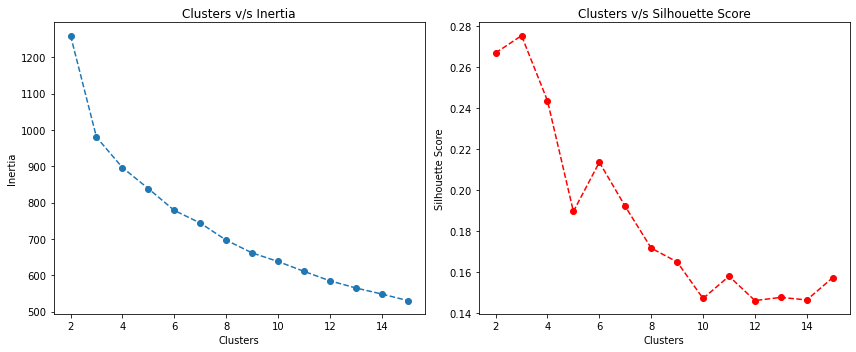

In [204]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(clusters, inertia, marker = 'o', linestyle = '--')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Clusters v/s Inertia")

plt.subplot(122)
plt.plot(clusters, sil_score, marker = 'o', linestyle = '--', color = 'r')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.title("Clusters v/s Silhouette Score")

plt.tight_layout()

Based on the above graph it is clear that the best value for k will be 3 with silhouette score at the highest at cluster 3 but we will be inspecting some other metrics as well to make sure our decision is right.

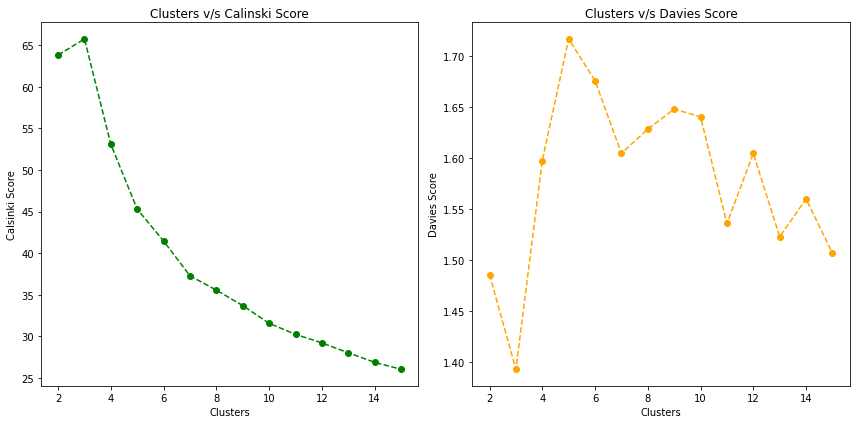

In [206]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(clusters, calinski_score, marker = 'o', linestyle = '--', color = 'g')
plt.xlabel("Clusters")
plt.ylabel("Calsinki Score")
plt.title("Clusters v/s Calinski Score")

plt.subplot(122)
plt.plot(clusters, davies_score, marker = 'o', linestyle = '--', color = 'orange')
plt.xlabel("Clusters")
plt.ylabel("Davies Score")
plt.title("Clusters v/s Davies Score")

plt.tight_layout()

When we check for the Calinski Index it is higher at the cluster 3 which is as same as the clusters suggested by the silhouette score but Davies index suggest the cluster 3 and 15 but we will select the cluster 3 as the calinski score and silhouette score is higher for cluster 3.

**For Your Information:**

**1) Calinski Harbarsz Index:** If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

**2) Davies Bouldin Index:** If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

In [125]:
k_model = KMeans(n_clusters = 3, init = "k-means++", n_jobs = -1 )

In [127]:
label_predict = k_model.fit_predict(df_)

In [135]:
centers = k_model.cluster_centers_

In [139]:
label_df = pd.DataFrame(label_predict, columns = ["Label"])

In [143]:
df_ = pd.concat([df_, label_df], axis = 1)

In [145]:
df_.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,Hue,Label
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,0.251717,0.362177,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.293321,0.406051,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,0.269020,0.318304,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.186068,-0.427544,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,-0.319276,0.362177,0


In [193]:
mapping = {0: 1, 1: 2, 2: 3}

In [195]:
df_["Label"] = df_["Label"].map(mapping)

In [196]:
df_['Label'].value_counts()

1    66
2    62
3    50
Name: Label, dtype: int64

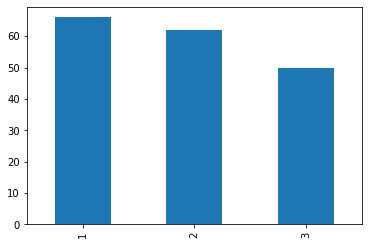

In [197]:
df_['Label'].value_counts().plot(kind="bar")